In [1]:
import os
import subprocess
from ROOT import TXMLEngine, XMLDocPointer_t, XMLNodePointer_t, Int_t
from ROOT import TFile, TTree
import numpy as np
import pandas as pd

from datetime import datetime
import dateutil

from matplotlib import pyplot as plt
import matplotlib.dates as mdates

Welcome to JupyROOT 6.28/00


In [2]:
def readCalibXML(filename):
    xml = TXMLEngine();
    xmldoc = xml.ParseFile(filename);
    root = xml.DocGetRootElement(xmldoc);
    cmsCondPayload = xml.GetChild(root)
    eb = xml.GetChild(cmsCondPayload)
    ee = xml.GetNext(eb)
    eb_calib = xml.GetChild(eb)
    ee_calib = xml.GetChild(ee)
    eb_abs_calib = []
    cnode = xml.GetChild(eb_calib) # counts
    eb_counts = int(xml.GetNodeContent(cnode)) # number of EB crystals
    cnode = xml.GetNext(cnode)
    cnode = xml.GetNext(cnode)
    i = 0
    for i in range(eb_counts):
        eb_abs_calib.append(float(xml.GetNodeContent(cnode)))
        i += 1
        if i%10000==1: print(i,eb_counts)
        cnode = xml.GetNext(cnode)
    ee_abs_calib = []
    cnode = xml.GetChild(ee_calib) # counts
    ee_counts = int(xml.GetNodeContent(cnode)) # number of EB crystals
    cnode = xml.GetNext(cnode)
    cnode = xml.GetNext(cnode)
    i = 0
    for i in range(ee_counts):
        ee_abs_calib.append(float(xml.GetNodeContent(cnode)))
        i += 1
        if i%10000==1: print(i,ee_counts)
        cnode = xml.GetNext(cnode)
    return np.array(eb_abs_calib),np.array(ee_abs_calib)

In [3]:
def count_hits(start_run, end_run):
    check_runs = []
    for i in range(start_run, end_run+1):
        if str(i) in RUNS: check_runs.append(i)
    nevents = 0
    nhits = 0
    for _run in check_runs:
        _ntuplelist = [ automation_ntuple_dir+str(_run)+'/'+f for f in os.listdir(automation_ntuple_dir+str(_run)) if '.root' in f ]
        for _ntp in _ntuplelist:
            _file = None
            try: 
                _file = TFile.Open(_ntp, 'read')
            except(OSError):
                if _ntp not in expFiles: expFiles.append(_ntp)
                continue
            _eventTree = _file.Get('timing/EcalSplashTiming/timingTree')
            _hitTree = _file.Get('timing/EcalSplashTiming/timingEventsTree')
            nevents += _eventTree.GetEntriesFast()
            nhits += _hitTree.GetEntriesFast()
            _file.Close()
    return nevents, nhits

In [4]:
def get_avg_production_time(path_to_dir):
    subp

In [5]:
p = subprocess.run(['ls','-l','/eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/366833/'], capture_output=True)

In [6]:
longlist = [l.split(' ') for l in p.stdout.decode('UTF-8').split('\n') if 'root' in l]

In [16]:
production_times = []
for _list in longlist:
    _tstamp = datetime.strptime(_list[8]+'-'+_list[6]+'-2023 '+_list[9], '%d-%b-%Y %H:%M')

ValueError: time data '20:03--2023 AlcaPhiSym_timing_1.root' does not match format '%d-%b-%Y %H:%M'

In [213]:
pd.Timestamp(datetime(2023, 5, 2, 19, 30))

Timestamp('2023-05-02 19:30:00')

In [4]:
automation_ntuple_dir = '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/'
RUNS = os.listdir(automation_ntuple_dir)
expFiles = []

In [44]:
run_lumi_list = pd.read_csv('run_lumi_era_refined_v2.csv',delimiter=',')
run_lumi_list.head()

,fill_number,first_run_number,last_run_number,delivered_lumi,era,end_time,lumi_sum
0,8637,366396,366442,0.364559,Run2023B,2023-04-22 00:35:54,0.364559
1,8639,366448,366454,1.717864,Run2023B,2023-04-22 15:03:47,1.717864
2,8642,366463,366475,12.642498,Run2023B,2023-04-23 06:30:40,12.642498
3,8644,366488,366500,15.500594,Run2023B,2023-04-23 22:27:36,15.500594
4,8645,366501,366504,15.816271,Run2023B,2023-04-24 11:12:16,15.816271


In [8]:
columns = run_lumi_list.columns
print(columns)

Index(['fill_number', 'first_run_number', 'last_run_number', 'delivered_lumi',
       'era', 'end_time', 'lumi_sum'],
      dtype='object')


In [9]:
nhits_array = []
nevents_array = []
for f_, l_ in zip(run_lumi_list.first_run_number.values, run_lumi_list.last_run_number.values):
    evt_, ht_ = count_hits(f_,l_)
    nhits_array.append(ht_)
    nevents_array.append(evt_)
run_lumi_list['nhits'] = nhits_array
run_lumi_list['nevents'] = nevents_array

Error in <TFile::Init>: file /eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/366403/AlcaPhiSym_timing_4.root is truncated at 59113472 bytes: should be 267516310, trying to recover
Info in <TFile::Recover>: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/366403/AlcaPhiSym_timing_4.root, recovered key TDirectoryFile:timing at address 272
Warning in <TFile::Init>: successfully recovered 1 keys
Error in <TFile::ReadBuffer>: error reading all requested bytes from file /eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/366403/AlcaPhiSym_timing_4.root, got 0 of 7506
Warning in <TFile::GetRecordHeader>: /eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/366403/AlcaPhiSym_timing_4.root: failed to read the StreamerInfo data from disk.
Error in <TFile::Init>: file /eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/366500/AlcaPhiSym_timing_3.root is truncated at 26214400 bytes: should be 247198453,

In [10]:
expFiles

['/eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/366403/AlcaPhiSym_timing_4.root',
 '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/366500/AlcaPhiSym_timing_3.root',
 '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/367589/AlcaPhiSym_timing_4.root',
 '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/367790/AlcaPhiSym_timing_3.root',
 '/eos/cms/store/group/dpg_ecal/alca_ecalcalib/automation_prompt/timing/367840/AlcaPhiSym_timing_2.root']

In [15]:
hitsum = 0
frun = -1
size = len(run_lumi_list['nhits'])
for i in range(size):
    if frun==-1:
        frun = run_lumi_list['first_run_number'][i]
        hitsum = run_lumi_list['nhits'][i]
    else:
        hitsum += run_lumi_list['nhits'][i]
    if float(hitsum/1e6)>200:
        print(frun, run_lumi_list['last_run_number'][i], run_lumi_list['era'][i].replace('Run',''), hitsum/1e6)
        hitsum = 0
        frun = -1
print(frun, run_lumi_list['last_run_number'][i], run_lumi_list['era'][i].replace('Run',''), hitsum/1e6)

366396 366442 2023B 596.177433
366448 366454 2023B 1102.815076
366463 366500 2023B 985.748951
366501 366504 2023B 1394.941019
366531 366730 2023B 288.046785
366792 366804 2023B 626.720656
366806 366821 2023B 211.859595
366828 366843 2023B 270.997671
366844 366876 2023B 210.163636
366877 366895 2023B 226.722944
366924 367066 2023B 304.411973
367067 367097 2023C 210.654002
367098 367104 2023C 209.956399
367105 367112 2023C 219.225395
367115 367234 2023C 361.357409
367253 367271 2023C 311.011243
367305 367337 2023C 246.793653
367354 367477 2023C 368.622594
367505 367556 2023C 294.373588
367579 367622 2023C 206.365513
367657 367702 2023C 268.277885
367728 367832 2023C 302.903371
367833 367866 2023C 257.822715
367880 367884 2023C 221.760838
367890 368223 2023C 180.314078


In [147]:
condb_records = [
[362523, '2022-11-24 19:54:19',  'b60525d6a072be44bf089f5a8b7a89d4139d33c2'],
[367095, '2023-05-08 13:07:29',  '9f5d28247582dbe62c727b28f86b2baa8d871990'],
[367516, '2023-05-17 12:49:49',  'fbcddb1c430060dcec9414728dbdc70b7e90c23f'],
[367884, '2023-05-26 11:32:50',  '18e76d319df1921bab32f287350c3e1a427b3dba']
]

Drop the last column as it has incomplete lumi. Check if the new conditions were inserted before the endtime of the runs and update the payloads.

In [50]:
run_lumi_list = run_lumi_list[(run_lumi_list['fill_number']!=8850)]

In [148]:
conddb_map = {
    (362523, 367227) : 'b60525d6a072be44bf089f5a8b7a89d4139d33c2',
    (367227, 367657) : '9f5d28247582dbe62c727b28f86b2baa8d871990',
    (367657, 367910) : 'fbcddb1c430060dcec9414728dbdc70b7e90c23f',
    (367910, 368000) : '18e76d319df1921bab32f287350c3e1a427b3dba'
}

In [130]:
hitsum = 0
frun = -1
size = len(run_lumi_list['nhits'])
for i in range(size):
    payloadstr = '\n'
    for _rr in conddb_map:
        _ri = _rr[0]
        _re = _rr[1]
        if run_lumi_list['first_run_number'][i]>=_ri and run_lumi_list['first_run_number'][i]<_re:
            payloadstr = ' --payload '+conddb_map[_rr]
    if frun==-1:
        frun = run_lumi_list['first_run_number'][i]
        hitsum = run_lumi_list['nhits'][i]
    else:
        hitsum += run_lumi_list['nhits'][i]
    if float(hitsum/1e6)>200:
        print('python run_local.py -s', frun, '-e', run_lumi_list['last_run_number'][i], '--era ', run_lumi_list['era'][i].replace('Run',''), payloadstr)
        hitsum = 0
        frun = -1
print('python run_local.py -s', frun, '-e ', run_lumi_list['last_run_number'][i], '--era ', run_lumi_list['era'][i].replace('Run',''), payloadstr)

python run_local.py -s 366396 -e 366442 --era  2023B  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2
python run_local.py -s 366448 -e 366454 --era  2023B  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2
python run_local.py -s 366463 -e 366500 --era  2023B  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2
python run_local.py -s 366501 -e 366504 --era  2023B  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2
python run_local.py -s 366531 -e 366730 --era  2023B  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2
python run_local.py -s 366792 -e 366804 --era  2023B  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2
python run_local.py -s 366806 -e 366821 --era  2023B  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2
python run_local.py -s 366828 -e 366843 --era  2023B  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2
python run_local.py -s 366844 -e 366876 --era  2023B  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2
python run_local.py -s 366877 -e 366895 --era  2023B  -

In [104]:
jobs_done = [
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023B/Calibration/366806_366821_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023B/Calibration/366828_366843_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023B/Calibration/366844_366895_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023B/Calibration/366924_367066_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367067_367097_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367098_367104_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367105_367112_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367266_367271_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367354_367539_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367546_367597_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367612_367667_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367680_367739_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367741_367884_tCut_10',
'/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367890_368223_tCut_10',
]

In [149]:
payloadstr = ''
for _job in jobs_done:
    # record lumi
    runs = _job.split('/')[10].split('_')
    era = _job.split('/')[8].replace('Run','')
    s = int(runs[0])
    e = int(runs[1])
    for _rr in conddb_map:
        _ri = _rr[0]
        _re = _rr[1]
        if s>=_ri and e<_re:
            payloadstr = ' --payload '+conddb_map[_rr]
            print('python3 run_local.py -s {} -e {} -r 10 {} --era {}'.format(s, e, payloadstr, era))
            break

python3 run_local.py -s 366806 -e 366821 -r 10  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2 --era 2023B
python3 run_local.py -s 366828 -e 366843 -r 10  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2 --era 2023B
python3 run_local.py -s 366844 -e 366895 -r 10  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2 --era 2023B
python3 run_local.py -s 366924 -e 367066 -r 10  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2 --era 2023B
python3 run_local.py -s 367067 -e 367097 -r 10  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2 --era 2023C
python3 run_local.py -s 367098 -e 367104 -r 10  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2 --era 2023C
python3 run_local.py -s 367105 -e 367112 -r 10  --payload b60525d6a072be44bf089f5a8b7a89d4139d33c2 --era 2023C
python3 run_local.py -s 367266 -e 367271 -r 10  --payload 9f5d28247582dbe62c727b28f86b2baa8d871990 --era 2023C
python3 run_local.py -s 367354 -e 367539 -r 10  --payload 9f5d28247582dbe62c727b28f86b2baa8d871990 --era 2023C
p

In [63]:
run_lumi_list

,fill_number,first_run_number,last_run_number,delivered_lumi,era,end_time,lumi_sum,nhits,nevents
0,8637,366396,366442,0.364559,Run2023B,2023-04-22 00:35:54,0.364559,596177433,3544625
1,8639,366448,366454,1.717864,Run2023B,2023-04-22 15:03:47,1.717864,1102815076,5083348
2,8642,366463,366475,12.642498,Run2023B,2023-04-23 06:30:40,12.642498,0,0
3,8644,366488,366500,15.500594,Run2023B,2023-04-23 22:27:36,15.500594,985748951,5608413
4,8645,366501,366504,15.816271,Run2023B,2023-04-24 11:12:16,15.816271,1394941019,5906063
5,8654,366531,366535,1.420537,Run2023B,2023-04-25 05:49:09,1.420537,104570744,523289
6,8675,366718,366730,55.300752,Run2023B,2023-04-28 03:22:57,55.300752,183476041,1414650
7,8685,366792,366804,75.660074,Run2023B,2023-04-29 16:02:32,75.660074,626720656,2914534
8,8686,366806,366821,85.519816,Run2023B,2023-04-30 03:08:15,85.519816,211859595,1420616
9,8690,366828,366833,74.285600,Run2023B,2023-04-30 16:26:56,74.285600,171978228,1340652


In [143]:
lumi_array = []
endtime_array = []
job_calib = []
save_lumi = -1
prev_end = -1
for _job in jobs_done:
    # record lumi
    runs = _job.split('/')[10].split('_')
    s = int(runs[0])
    e = int(runs[1])
    _slice = run_lumi_list[((run_lumi_list['first_run_number']>=s)&(run_lumi_list['last_run_number']<=e))]
    _et = prev_end
    _et = _slice['end_time'].values[-1]
    _lumi = _slice['delivered_lumi'].sum()
    
    # read xml files
    _xmlfile = [ _job+'/'+_f for _f in os.listdir(_job) if 'xml' in _f ]
    if len(_xmlfile)==0:
        save_lumi = _lumi
        print('Empty: ',_job)
        continue
    if save_lumi!=-1:
        _lumi += save_lumi
        save_lumi = -1
        
    _xmlfile = _xmlfile[0]
    print(_xmlfile)
    _ebc, _eec = readCalibXML(_xmlfile)
    job_calib.append(np.array([_ebc, _eec]))
    
    lumi_array.append(_lumi)
    endtime_array.append(_et)

/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023B/Calibration/366806_366821_tCut_10/ecalTiming-abs_2023_05_31.xml
1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023B/Calibration/366828_366843_tCut_10/ecalTiming-abs_2023_05_31.xml


/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))
/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))


1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
Empty:  /eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023B/Calibration/366844_366895_tCut_10
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023B/Calibration/366924_367066_tCut_10/ecalTiming-abs_2023_05_31.xml
1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648


/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))
/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))


/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367067_367097_tCut_10/ecalTiming-abs_2023_05_31.xml
1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367098_367104_tCut_10/ecalTiming-abs_2023_05_31.xml
1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367105_367112_tCut_10/ecalTiming-abs_2023_05_31.xml
1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367266_367271_tCut_10/ecalTiming-abs_2023_05_30.xml


/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))
/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))


1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367354_367539_tCut_10/ecalTiming-abs_2023_05_31.xml
1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367546_367597_tCut_10/ecalTiming-abs_2023_05_31.xml
1 61200
10001 61200
20001 61200


/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))
/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))


30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367612_367667_tCut_10/ecalTiming-abs_2023_05_31.xml
1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367680_367739_tCut_10/ecalTiming-abs_2023_05_31.xml
1 61200
10001 61200
20001 61200

/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))
/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))



30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367741_367884_tCut_10/ecalTiming-abs_2023_05_31.xml
1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648
/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367890_368223_tCut_10/ecalTiming-abs_2023_05_31.xml


/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))
/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))


1 61200
10001 61200
20001 61200
30001 61200
40001 61200
50001 61200
60001 61200
1 14648
10001 14648


/tmp/ipykernel_1522/4005976857.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  job_calib.append(np.array([_ebc, _eec]))


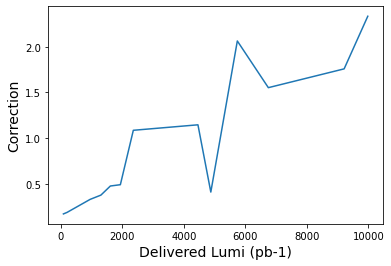

In [150]:
A = [ job_calib[i][0][100] for i in range(len(lumi_array)) ]
L = np.cumsum(lumi_array)
plt.plot(L, A, label='crystal index 100')
plt.xlabel('Delivered Lumi (pb-1)', fontsize=14)
plt.ylabel('Correction', fontsize=14)
plt.show()

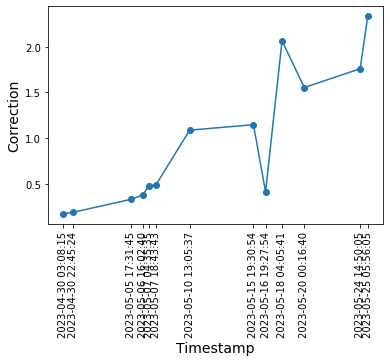

In [151]:
A = [ job_calib[i][0][100] for i in range(len(lumi_array)) ]
T = endtime_array
dates = [dateutil.parser.parse(t) for t in T]
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Correction', fontsize=14)
ax=plt.gca()
ax.set_xticks(dates)

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates, T = zip(*sorted(zip(dates, T)))
plt.plot(dates, A, "o-")
plt.xticks(rotation=90)
plt.show()

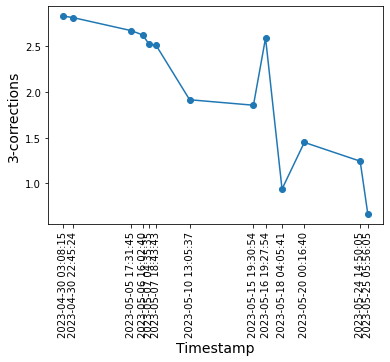

In [152]:
A = 3-np.array([ job_calib[i][0][100] for i in range(len(lumi_array)) ])
T = endtime_array
dates = [dateutil.parser.parse(t) for t in T]
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('3-corrections', fontsize=14)
ax=plt.gca()
ax.set_xticks(dates)

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates, T = zip(*sorted(zip(dates, T)))
plt.plot(dates, A, "o-")
plt.xticks(rotation=90)
plt.show()

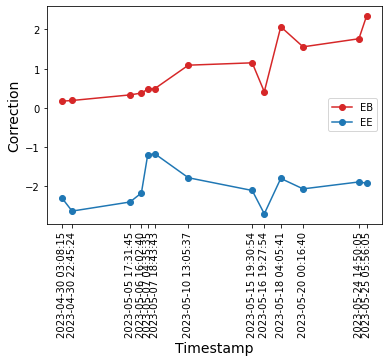

In [153]:
A = [ np.average(job_calib[i][0]) for i in range(len(lumi_array)) ]
B = [ np.average(job_calib[i][1]) for i in range(len(lumi_array)) ]
T = endtime_array
dates = [dateutil.parser.parse(t) for t in T]
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Correction', fontsize=14)
ax=plt.gca()
ax.set_xticks(dates)

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates, T = zip(*sorted(zip(dates, T)))
plt.plot(dates, A, "o-", color='tab:red', label='EB')
plt.plot(dates, B, "o-", color='tab:blue', label='EE')
plt.xticks(rotation=90)
plt.legend(loc='center right')
plt.show()